In [96]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to suppress all INFO and WARNING messages
import tensorflow as tf

In [97]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

In [98]:
# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [99]:
path="/Users/ud/Downloads/solar_weather[1].csv"
df=pd.read_csv(path)

In [100]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [101]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [103]:
#Change dataframe index to datetime
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')

In [104]:
#converting time data to time signal
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483229e+09
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483230e+09
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483231e+09
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483232e+09
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,1.483232e+09


These sine and cosine transformations are useful for encoding cyclical patterns that repeat over time, such as daily and annual seasonality. By representing time-related features in this way, machine learning models can better capture these periodic patterns when making predictions or conducting time series analysis.
In the code you provided, sine and cosine transformations of the 'timestamp' feature are used to represent daily and annual patterns. By having both sine and cosine components, you can capture variations in both the phase (timing) and amplitude (intensity) of these cyclic patterns. This is particularly valuable when analyzing time series data and building models that need to account for the cyclical nature of the data, such as seasonal decomposition or forecasting models.

In [105]:
day = 60 * 60 * 24  # Number of seconds in a day
year = 365.2425 * day  # Number of seconds in a year (considering leap years)

# Create new columns for sine and cosine transformations of time-related features
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))


In [106]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [107]:
import pandas as pd
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')

                     Energy delta[Wh]   GHI  temp  pressure  humidity  wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  SunlightTime/daylength  weather_type   day sin   day cos  year sin  year cos
Time                                                                                                                                                                                                                         
2017-01-01 12:30:00                42   6.0   3.8      1014        90         5.9      0.0      0.0         100      1           330        450                    0.73             4 -0.130526 -0.991445  0.019323  0.999813
2017-01-01 12:45:00                42   3.7   3.8      1014        90         5.9      0.0      0.0         100      1           345        450                    0.77             4 -0.195090 -0.980785  0.019502  0.999810
2017-01-01 13:00:00                55  11.7   3.9      1013        89         6.1      0.0      0.0          98 

In [111]:
df.iloc[50:55]

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 12:30:00,42,6.0,3.8,1014,90,5.9,0.0,0.0,100,1,330,450,0.73,4,-0.130526,-0.991445,0.019323,0.999813
2017-01-01 12:45:00,42,3.7,3.8,1014,90,5.9,0.0,0.0,100,1,345,450,0.77,4,-0.195090,-0.980785,0.019502,0.999810
2017-01-01 13:00:00,55,11.7,3.9,1013,89,6.1,0.0,0.0,98,1,360,450,0.80,4,-0.258819,-0.965926,0.019682,0.999806
2017-01-01 13:15:00,96,10.2,3.9,1013,89,6.1,0.0,0.0,98,1,375,450,0.83,4,-0.321439,-0.946930,0.019861,0.999803
2017-01-01 13:30:00,62,8.3,3.9,1013,89,6.1,0.0,0.0,98,1,390,450,0.87,4,-0.382683,-0.923880,0.020040,0.999799


In [75]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
day sin                   0
day cos                   0
year sin                  0
year cos                  0
dtype: int64

In [14]:
df.index.min(),df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-08-31 17:45:00'))

Time of the dataset ranges hourly from '2017-01-01 00:00:00' to '2022-08-31 17:45:00'¶

In [15]:
# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
#X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.9, shuffle=False)


My plan is to predict the data based from the previous 20 data points using LSTM

If you observe that past solar power values significantly influence future values, using a WINDOW_SIZE can help the model capture these dependencies. For example, daily or seasonal patterns might benefit from a WINDOW_SIZE
If your data has a high frequency (e.g., minute-by-minute measurements), shorter WINDOW_SIZE values may be appropriate. 

In [16]:
WINDOW_SIZE = 20

In [17]:
train_count = round(0.8 * len(df))
val_count = round(0.9 * len(df))

In [18]:
# Specify the date for splitting
split_date = '2022-01-01'

# Split the datasets based on the date
df_train = df[df.index < split_date]

df_test = df[df.index >= split_date]

In [19]:
df_val = df[train_count:val_count]

In [20]:
df_train.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


In [21]:
df_test.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0,0.0,9.6,1014,97,5.1,0.0,0.0,100,0,0,450,0.0,4,-8.652299e-12,1.000000,0.006709,0.999977
2022-01-01 00:15:00,0,0.0,9.6,1014,97,5.1,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.006888,0.999976
2022-01-01 00:30:00,0,0.0,9.6,1014,97,5.1,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.007067,0.999975
2022-01-01 00:45:00,0,0.0,9.6,1014,97,5.1,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.007247,0.999974
2022-01-01 01:00:00,0,0.0,9.6,1014,96,4.7,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.007426,0.999972


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Manually Creating Sequences:

Customization: If you need more control over how your data sequences are structured (e.g., creating overlapping or non-overlapping sequences, custom feature engineering), manually creating sequences as in your df_to_data1 function can be beneficial.

Sequence Length: You can specify the exact sequence length (window size) you want in your data sequences, which is essential for time series forecasting.

Domain-Specific Processing: In some cases, you might need to perform domain-specific data preprocessing, feature extraction, or other transformations that aren't easily accomplished with train_test_split.

Fine-Tuning: Manually creating sequences allows you to fine-tune the data preparation process to suit your specific needs.

In [23]:
def df_to_data1(df, window_size=5):
    data = scaler.fit_transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [24]:
def df_to_data2(df, window_size=5):
    data = scaler.transform(df.drop('Energy delta[Wh]', axis='columns').to_numpy())
    labels = df['Energy delta[Wh]'].to_numpy()
    
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        row = data[i:i + window_size]
        X.append(row)
        y.append(labels[i + window_size])
        
    return np.array(X), np.array(y)

In [25]:
X_train, y_train = df_to_data1(df_train, window_size=WINDOW_SIZE)
X_val, y_val = df_to_data2(df_val, window_size=WINDOW_SIZE)
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [26]:
y_test

array([ 0,  0,  0, ..., 51, 24,  0])

HYPERPARAMETER SEARCH

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.LSTM(32, input_shape=(WINDOW_SIZE, X_train.shape[2])),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                6400      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,385
Trainable params: 7,385
Non-trainabl

In [28]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=1,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[early_stopping])

Epoch 1/10
5439/5439 [==============================] - 86s 15ms/step - loss: 227395.8438 - mse: 227395.8438 - mae: 290.9213 - val_loss: 130700.6094 - val_mse: 130700.6094 - val_mae: 273.1095
Epoch 2/10
5439/5439 [==============================] - 82s 15ms/step - loss: 128123.1172 - mse: 128123.1172 - mae: 216.5091 - val_loss: 85901.2969 - val_mse: 85901.2969 - val_mae: 153.5402
Epoch 3/10
5439/5439 [==============================] - 82s 15ms/step - loss: 118594.9766 - mse: 118594.9766 - mae: 202.0114 - val_loss: 85650.5938 - val_mse: 85650.5938 - val_mae: 146.1777
Epoch 4/10
5439/5439 [==============================] - 82s 15ms/step - loss: 106208.3828 - mse: 106208.3828 - mae: 170.4633 - val_loss: 91751.2266 - val_mse: 91751.2266 - val_mae: 167.5428


In [29]:
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)
train_predictions = model.predict(X_train)

5439/5439 [==============================] - 18s 3ms/step


In [30]:
for value in test_predictions[0:55]:
    print(value)

[-24.585495]
[-22.595963]
[-22.135445]
[-21.502533]
[-20.931824]
[-19.24366]
[-18.248413]
[-17.567581]
[-17.290253]
[3.0812302]
[71.778366]
[97.33852]
[155.50171]
[231.74692]
[187.35283]
[139.3094]
[157.71031]
[323.59546]
[239.1092]
[168.49536]
[153.58305]
[164.94348]
[210.52065]
[185.34683]
[147.7567]
[150.45454]
[188.82832]
[209.59563]
[180.8]
[197.67091]
[190.32356]
[333.21326]
[349.68658]
[212.78049]
[69.659744]
[57.887096]
[57.71331]
[23.786789]
[-14.189224]
[-41.02539]
[-46.195923]
[-40.932617]
[-37.50663]
[-37.180267]
[-38.018524]
[-39.044624]
[-40.46202]
[-41.76609]
[-43.13347]
[-45.601494]
[-46.700195]
[-48.148766]
[-49.450035]
[-50.533035]
[-52.23831]


In [31]:
import numpy as np

# Set predicted negative values to zero
test_predictions[test_predictions < 0] = 0
val_predictions[val_predictions < 0] = 0
train_predictions[train_predictions < 0] = 0

In [32]:
for value in y_test[50:55]:
    print(value)

0
0
0
0
0


In [33]:
for value in test_predictions[50:55]:
    print(value)

[0.]
[0.]
[0.]
[0.]
[0.]


In [43]:
# Convert test_predictions to 1D array if it's not already
test_predictions = test_predictions.flatten()

# Create a DataFrame with y_test and test_predictions
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predictions})

# Assuming comparison_df is your DataFrame
print(comparison_df.iloc[10000:10051])  # Adjust the number inside head() to display more or fewer rows

       Actual    Predicted
10000    2530  2271.916748
10001    2039  2450.398926
10002    2310  2310.260010
10003    3138  2475.706299
10004    2771  2840.948975
10005    3265  2693.817627
10006    3178  2719.225830
10007    3005  2778.091797
10008    2193  2681.940186
10009    3302  2618.932373
10010    4036  2654.755615
10011    2320  2448.246338
10012    1692  2064.704102
10013    2692  1995.412842
10014    1506  1840.492920
10015     981  1571.519531
10016     393  1446.981689
10017     396  1322.192017
10018     937  1606.951294
10019    2108  1604.189941
10020    1463  1270.646240
10021    1012  1032.548584
10022    2200  1462.966553
10023    1873  1428.708252
10024    1544  1377.822266
10025    1368  1238.083862
10026    1104  1029.443481
10027     849   826.421692
10028     623   695.066284
10029     428   632.179260
10030     274   443.110840
10031     182   317.362488
10032     128   222.400162
10033      88   168.490723
10034      57   134.985046
10035      25   107.097656
1

In [44]:
from sklearn.metrics import r2_score
# Print the accuracy
r_squared = r2_score(y_test, test_predictions)
print ("test data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_val, val_predictions)
print ("validation data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_train, train_predictions)
print ("train data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

test data accuracy
R-squared (R²): 0.8888
validation data accuracy
R-squared (R²): 0.8847
train data accuracy
R-squared (R²): 0.8976


In [45]:
X_test, y_test = df_to_data2(df_test, window_size=WINDOW_SIZE)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions[predictions < 0] = 0
    predictions = np.hstack(predictions)
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)


710/710 [==============================] - 3s 3ms/step
MSE 142593.96
MAE 186.05
SignificanceResult(statistic=0.918825860107007, pvalue=0.0)


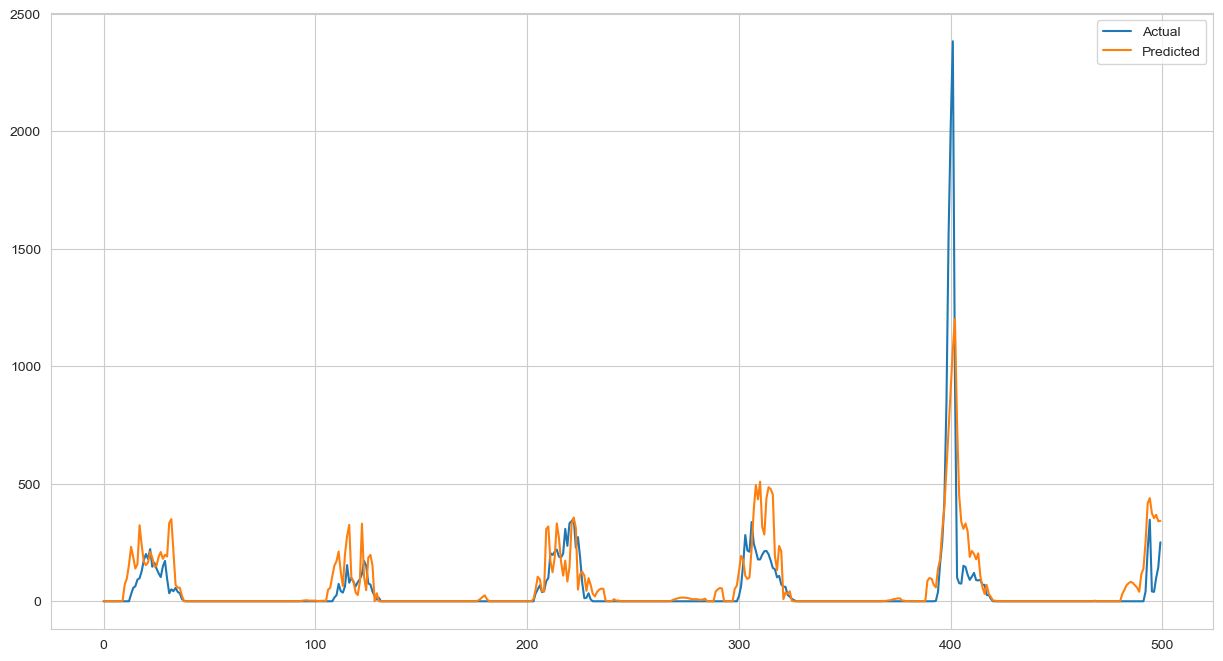

In [48]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)

In [53]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions[predictions < 0] = 0
    predictions = np.hstack(predictions)
    predictions_df = pd.DataFrame(predictions, columns=["Predicted Values"])
    y = pd.DataFrame(y)
    predictions_df.index = y.index
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions_df[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)

710/710 [==============================] - 2s 3ms/step
MSE 142593.96
MAE 186.05
SignificanceResult(statistic=0.918825860107007, pvalue=0.0)


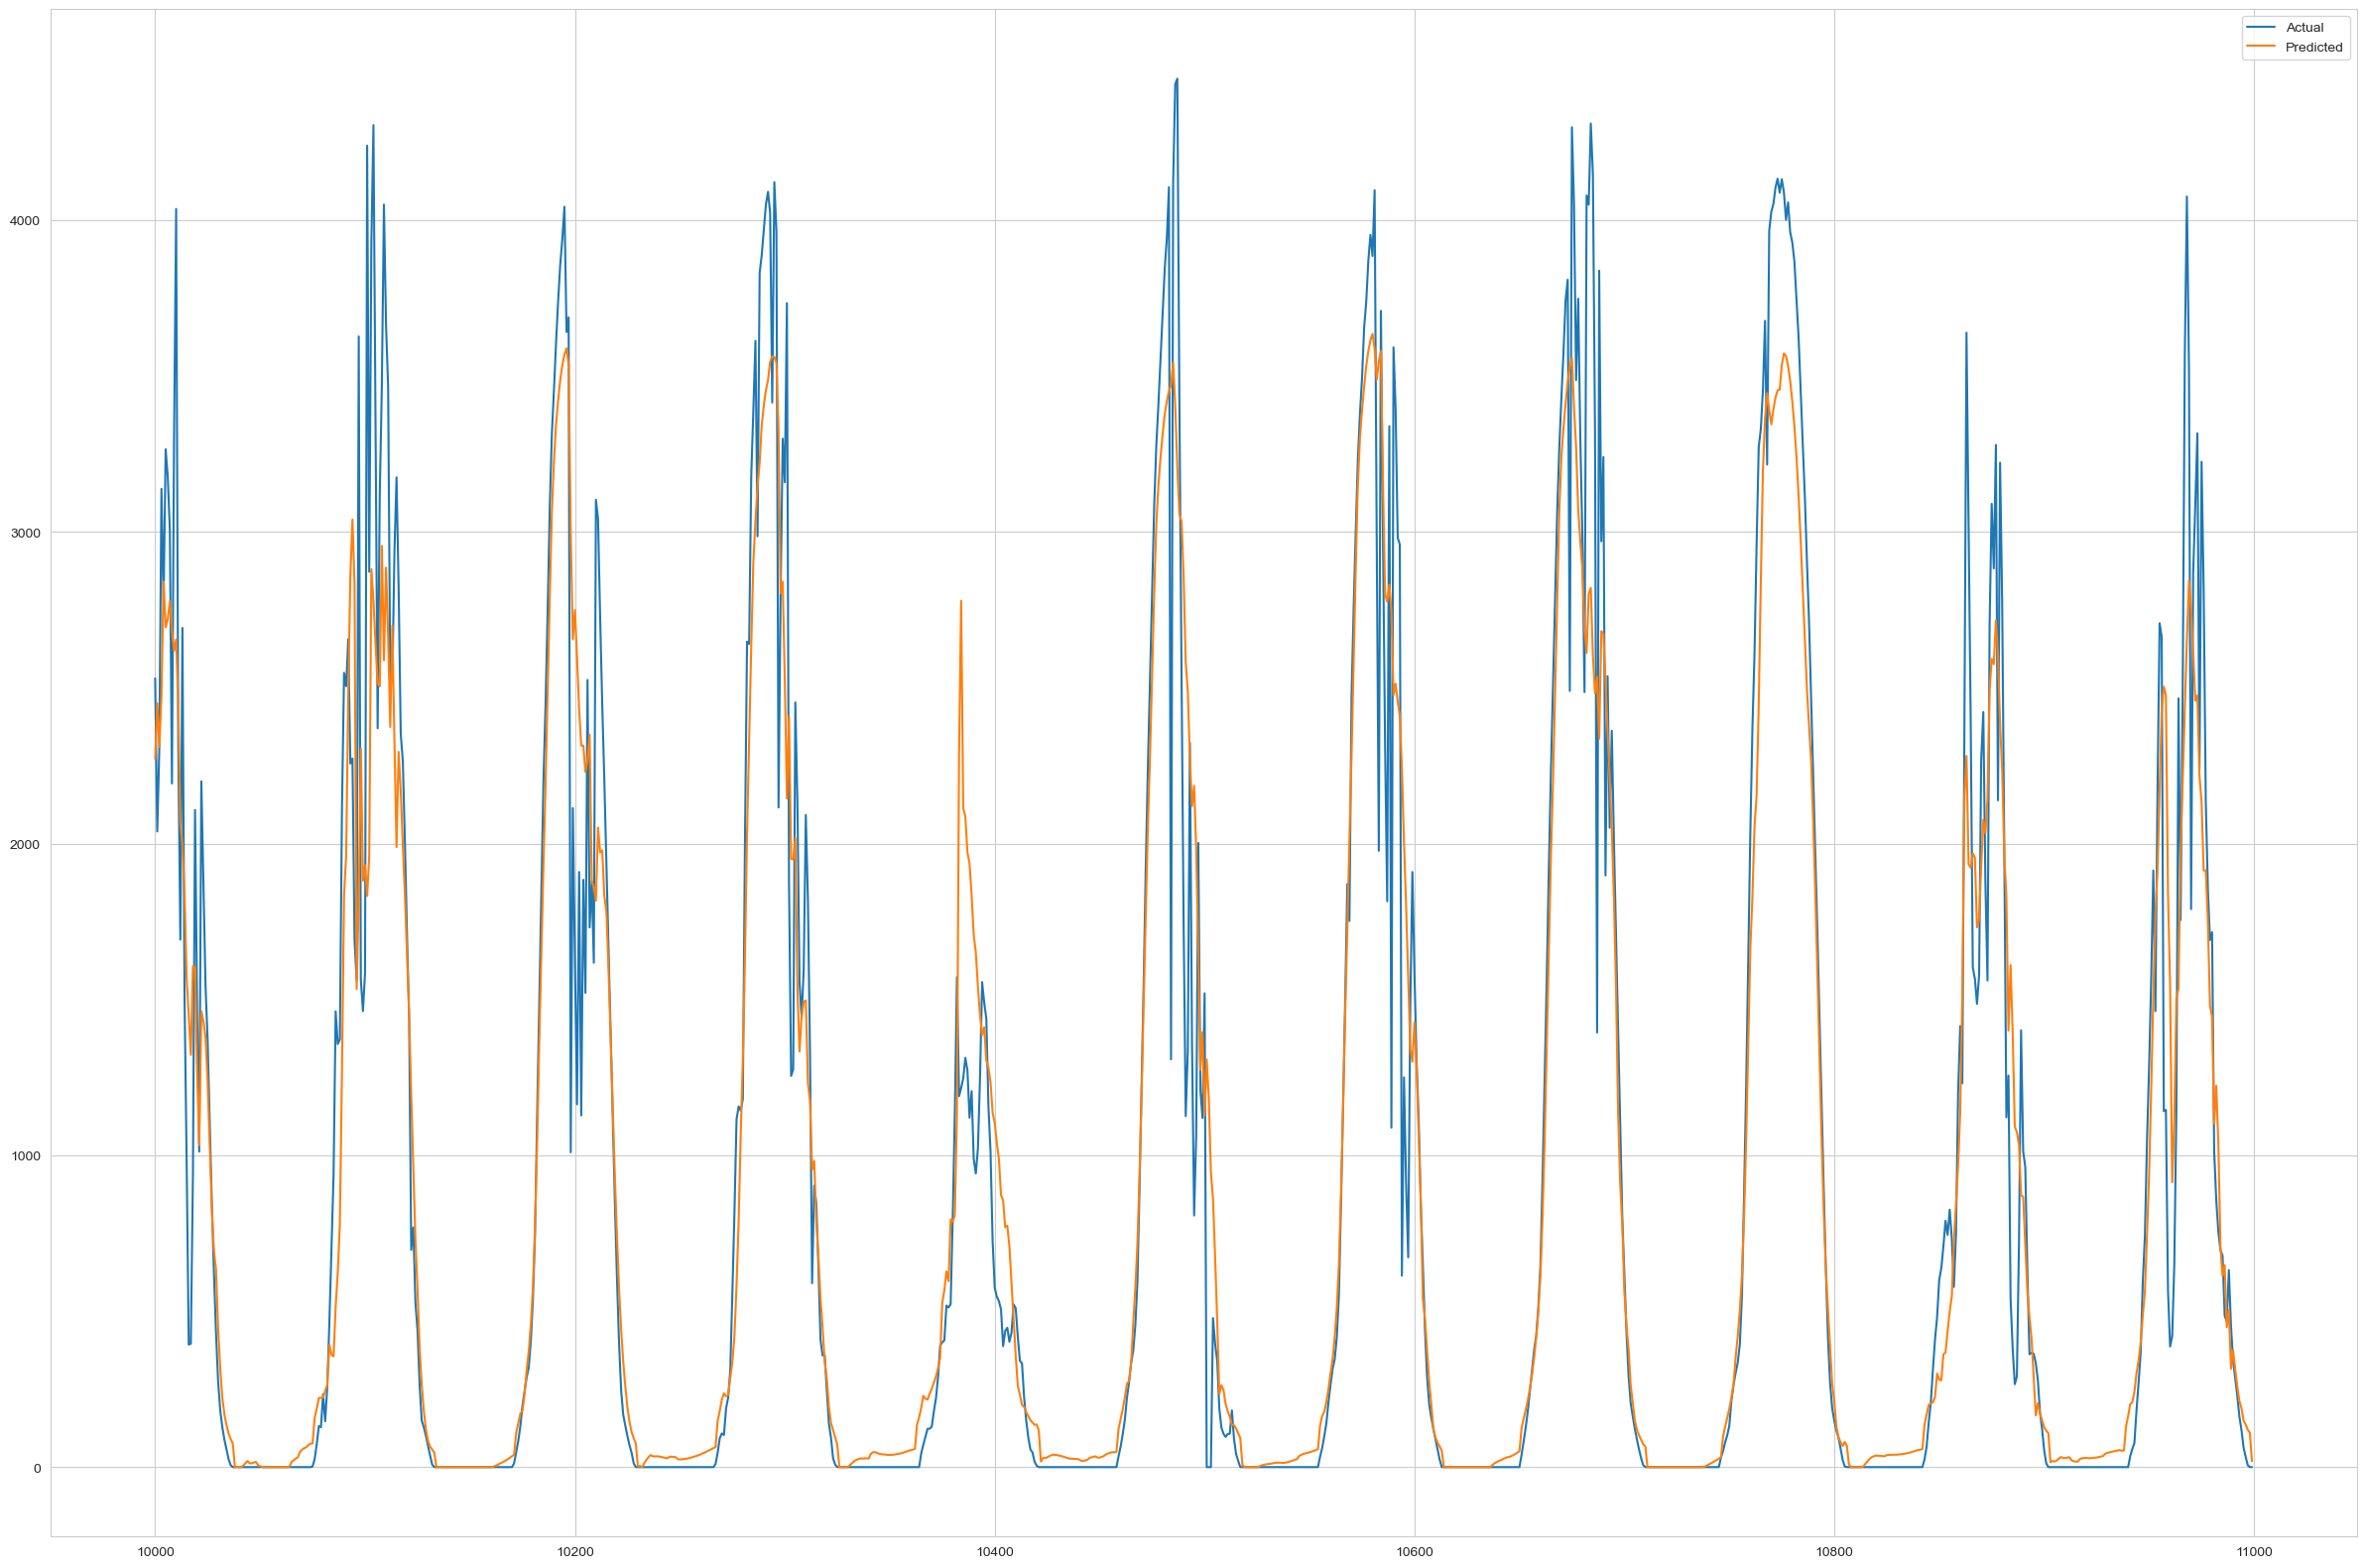

In [62]:
plt.figure(figsize=(30,20))
plotPredictions(X_test, y_test, start=10000, end=11000)

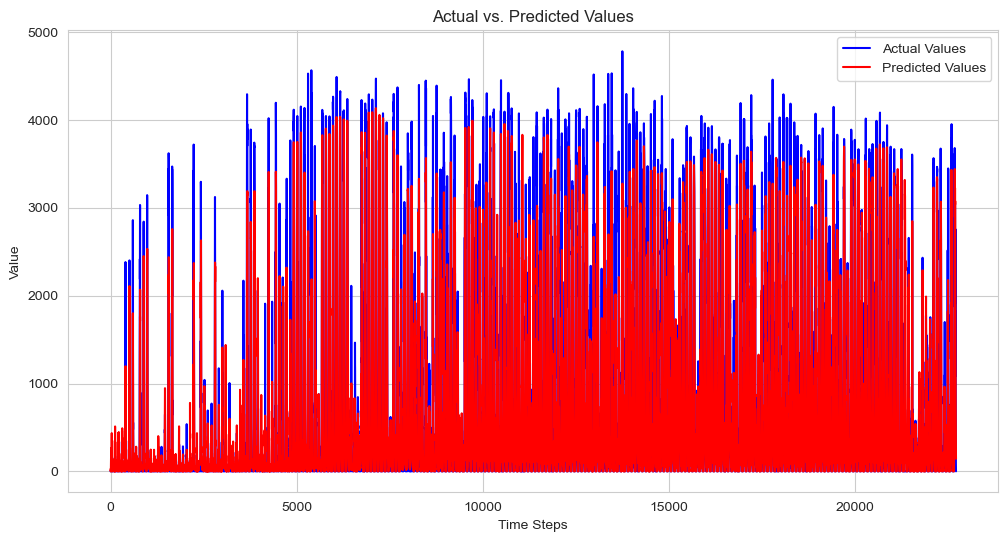

In [49]:
import matplotlib.pyplot as plt

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
test_predictions_df = pd.DataFrame(test_predictions, columns=["Predicted Values"])
y_test = pd.DataFrame(y_test)
test_predictions_df.index = y_test.index
plt.plot(test_predictions_df, label='Predicted Values', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()